In [4]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from datetime import datetime, timedelta

ImportError: DLL load failed while importing _pocketfft_umath: No se puede encontrar el módulo especificado.

In [3]:
crypto_currency='BTC'
against_currency='USD'

In [4]:
from datetime import datetime, timedelta

In [5]:
start = dt.datetime(2020, 1, 1, 0, 0)  # Fecha de inicio específica (29 de septiembre de 2021 a las 20:00)
end = start + timedelta(days=1135)

In [28]:
data=yf.download(f'{crypto_currency}-{against_currency}', start, end)
data.tail()

[*********************100%%**********************]  1 of 1 completed


In [32]:
from sklearn.metrics import mean_squared_error

# Calcular MSE
mse = mean_squared_error(data['Close'], pronostico)
print(f'Error cuadrático medio: {mse}')

Error cuadrático medio: 1508021.51254325


In [30]:
data.to_csv('crypto-intra-5m-dta-from-2012-tilnow.csv')

In [13]:
data=data.drop(['Low','Volume','Open','High','Adj Close'], axis=1)

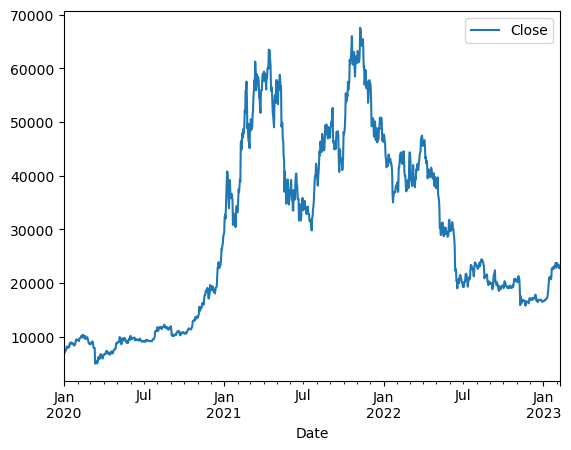

In [14]:
data.plot()
plt.show()

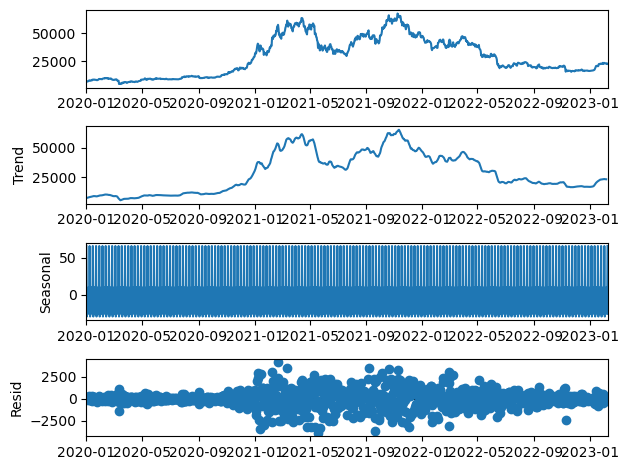

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer serie de tiempo
descomposicion = seasonal_decompose(data, model='additive')
descomposicion.plot()
plt.show()

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar modelo ARIMA
modelo = ARIMA(data, order=(5,1,0))
resultado = modelo.fit()

# Pronóstico
pronostico = resultado.forecast(steps=10)
print(pronostico)

2023-02-09    22933.468061
2023-02-10    22931.134957
2023-02-11    22942.005827
2023-02-12    22933.373433
2023-02-13    22930.545954
2023-02-14    22930.660489
2023-02-15    22930.850786
2023-02-16    22930.545506
2023-02-17    22930.371917
2023-02-18    22930.358378
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\Default.DESKTOP-PEHND4S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Default.DESKTOP-PEHND4S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Default.DESKTOP-PEHND4S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
#Prepare the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))
scaled_data.shape

(1135, 1)

In [31]:
star2=end
end2=star2+timedelta(days=10)
data=yf.download(f'{crypto_currency}-{against_currency}', star2, end2)


[*********************100%%**********************]  1 of 1 completed


In [16]:
prediction_days=60
x_train, y_train= [], []
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1075, 60, 1)

In [13]:
data['Close'][0]

434.3340148925781

In [17]:
#create the neural network 
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
#print(model.summary())



NameError: name 'Sequential' is not defined

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics='accuracy')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
72/72 [==============================] - 8s 54ms/step - loss: 0.0105 - accuracy: 4.3668e-04
Epoch 2/25
72/72 [==============================] - 4s 53ms/step - loss: 0.0029 - accuracy: 4.3668e-04
Epoch 3/25
72/72 [==============================] - 4s 53ms/step - loss: 0.0028 - accuracy: 4.3668e-04
Epoch 4/25
72/72 [==============================] - 4s 51ms/step - loss: 0.0024 - accuracy: 4.3668e-04
Epoch 5/25
72/72 [==============================] - 4s 53ms/step - loss: 0.0023 - accuracy: 4.3668e-04
Epoch 6/25
72/72 [==============================] - 4s 52ms/step - loss: 0.0021 - accuracy: 4.3668e-04 0s - loss: 0.0021 - accuracy: 4.59
Epoch 7/25
72/72 [==============================] - 4s 54ms/step - loss: 0.0021 - accuracy: 4.3668e-04
Epoch 8/25
72/72 [==============================] - 5s 67ms/step - loss: 0.0018 - accuracy: 4.3668e-04
Epoch 9/25
72/72 [==============================] - 5s 72ms/step - loss: 0.0018 - accuracy: 4.3668e-04
Epoch 10/25
72/72 [===================

In [ ]:
data=

In [20]:
#testing the model
test_start=dt.datetime(2021,1,1)
test_end=dt.datetime.now()
test_data=web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)
actual_prices=test_data['Close'].values

total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)
model_imputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_imputs=model_imputs.reshape(-1,1)
model_imputs=scaler.fit_transform(model_imputs)

x_test=[]
for x in range(prediction_days,len(model_imputs)):
    x_test.append(model_imputs[x-prediction_days:x,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predict_prices=model.predict(x_test)
predict_prices=scaler.inverse_transform(predict_prices)

<function matplotlib.pyplot.show(close=None, block=None)>

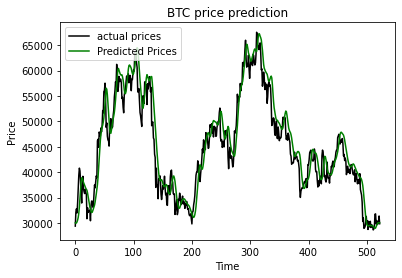

In [21]:
#plotting predictions
plt.plot(actual_prices, color='black', label='actual prices')
plt.plot(predict_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show